<a href="https://colab.research.google.com/github/JulyTheMonth/vanaJupyter/blob/main/Taylor_xy_2nd_order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plateau
In this notebook, we compute the 2nd order taylor approximation of $f(x,y) = 1/\sqrt{x^2+y^2}$ around point $p = (x0,y0)$.

First, we define the function

In [20]:
import sympy as sp
from IPython.display import display

# Define Symbols
x, y = sp.symbols('x y')

# define point
x0 = 1
y0 = 1

# Define Function
f = sp.E**(x*y)

display(f)

exp(x*y)

We then compute the gradient with the first derivatives

In [21]:
# first derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

gradient = sp.Matrix([df_dx, df_dy])

display("grad f:", gradient)


'grad f:'

Matrix([
[y*exp(x*y)],
[x*exp(x*y)]])

Computing the second derivatives, we build the Hessian matrix

In [22]:
# second derivatives
d2f_dx2 = sp.diff(df_dx, x)
d2f_dy2 = sp.diff(df_dy, y)
d2f_dxdy = sp.diff(df_dx, y)  ## = d2f_dydx  (Satz von Schwarz)

# Hessian
H = sp.Matrix([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

display("Hessian Matrix:")
display(H)


'Hessian Matrix:'

Matrix([
[          y**2*exp(x*y), x*y*exp(x*y) + exp(x*y)],
[x*y*exp(x*y) + exp(x*y),           x**2*exp(x*y)]])

Finally, we combine everything into the Taylor series

In [23]:
# compute constants
f0 = f.subs([(x,x0),(y,y0)])
df_dx0 = df_dx.subs([(x,x0),(y,y0)])
df_dy0 = df_dy.subs([(x,x0),(y,y0)])
d2f_dx20 = d2f_dx2.subs([(x,x0),(y,y0)])
d2f_dy20 = d2f_dy2.subs([(x,x0),(y,y0)])
d2f_dxdy0 = d2f_dxdy.subs([(x,x0),(y,y0)])

# Taylor series of second order
taylor_2nd_order = (f0
                    + df_dx0*(x-x0) + df_dy0*(y-y0)  ## linear
                    + 1/2*(d2f_dx20*(x-x0)**2 + 2*d2f_dxdy0*(x-x0)*(y-y0) + d2f_dy20*(y-y0)**2)  ## quadratic
                   )

display("Taylor series 2. Order:")
display(taylor_2nd_order)


'Taylor series 2. Order:'

0.5*E*(x - 1)**2 + 2.0*E*(x - 1)*(y - 1) + E*(x - 1) + 0.5*E*(y - 1)**2 + E*(y - 1) + E

All together

In [32]:
import sympy as sp
from IPython.display import display

# Definiere Symbole x und y
x, y = sp.symbols('x y')

# Definiere die Funktion
f = x**3+ y*x - y**3

# Erste Ableitungen
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Zweite Ableitungen
d2f_dx2 = sp.diff(df_dx, x)
d2f_dy2 = sp.diff(df_dy, y)
d2f_dxdy = sp.diff(df_dx, y)  ## = d2f_dydx  (Satz von Schwarz)

# Hesse-Matrix
H = sp.Matrix([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Taylorreihe zweiter Ordnung
x0 = 1
y0 = -1
f0 = f.subs([(x,x0),(y,y0)])
df_dx0 = df_dx.subs([(x,x0),(y,y0)])
df_dy0 = df_dy.subs([(x,x0),(y,y0)])
d2f_dx20 = d2f_dx2.subs([(x,x0),(y,y0)])
d2f_dy20 = d2f_dy2.subs([(x,x0),(y,y0)])
d2f_dxdy0 = d2f_dxdy.subs([(x,x0),(y,y0)])
taylor_2nd_order = (f0 + df_dx0*(x-x0) + df_dy0*(y-y0)
                  + 1/2*(d2f_dx20*(x-x0)**2 + 2*d2f_dxdy0*(x-x0)*(y-y0) + d2f_dy20*(y-y0)**2))

# Ausgabe der Ergebnisse
display("Erste Ableitungen:")
display("df/dx =", df_dx)
display("")
display("df/dy =", df_dy)
display("")
display("Zweite Ableitungen:")
display("d2f/dx^2 =", d2f_dx2)
display("")
display("d2f/dy^2 =", d2f_dy2)
display("")
display("d2f/dxdy =", d2f_dxdy)
display("")
display("Hesse-Matrix:")
display(H)
display("")
display("Taylorreihe 2. Ordnung:")
display(taylor_2nd_order)
display(sp.simplify(taylor_2nd_order))
display(taylor_2nd_order.subs([(x,1),(y,-1)]))


'Erste Ableitungen:'

'df/dx ='

3*x**2 + y

''

'df/dy ='

x - 3*y**2

''

'Zweite Ableitungen:'

'd2f/dx^2 ='

6*x

''

'd2f/dy^2 ='

-6*y

''

'd2f/dxdy ='

1

''

'Hesse-Matrix:'

Matrix([
[6*x,    1],
[  1, -6*y]])

''

'Taylorreihe 2. Ordnung:'

2*x - 2*y + 3.0*(x - 1)**2 + 0.5*(2*x - 2)*(y + 1) + 3.0*(y + 1)**2 - 3

3.0*x**2 + 1.0*x*y - 3.0*x + 3.0*y**2 + 3.0*y + 2.0

1

Plots for the motivational exercise

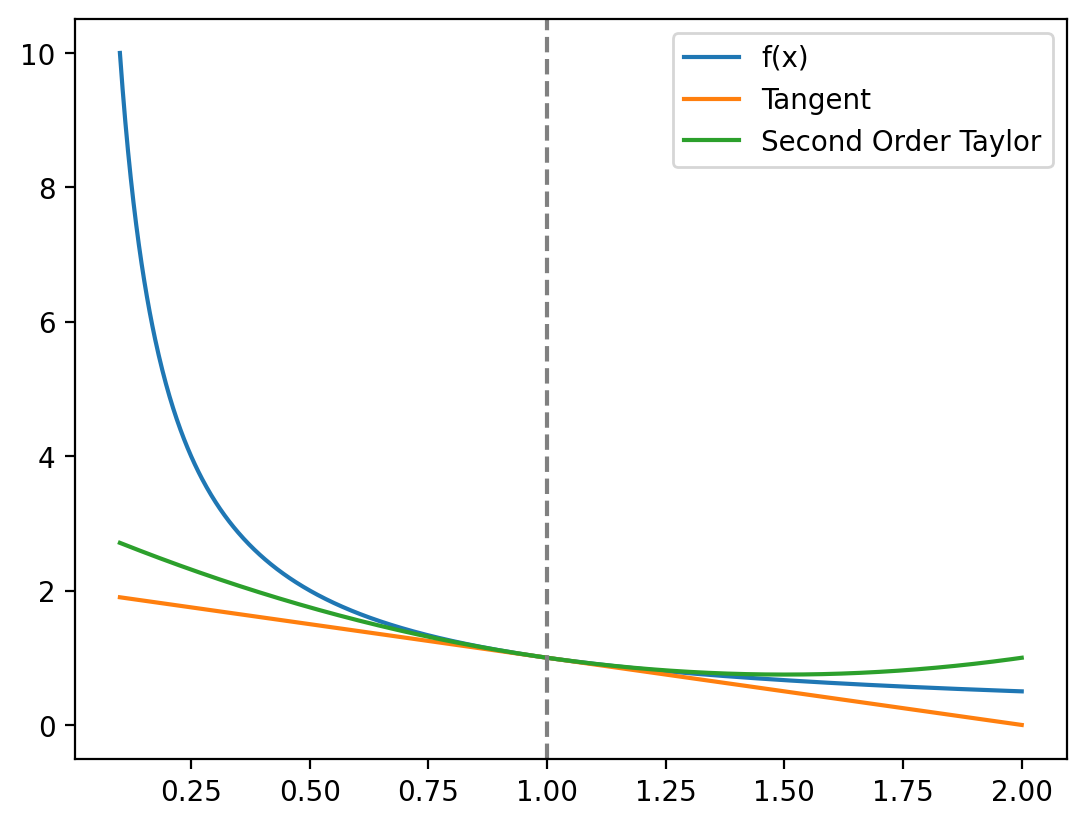

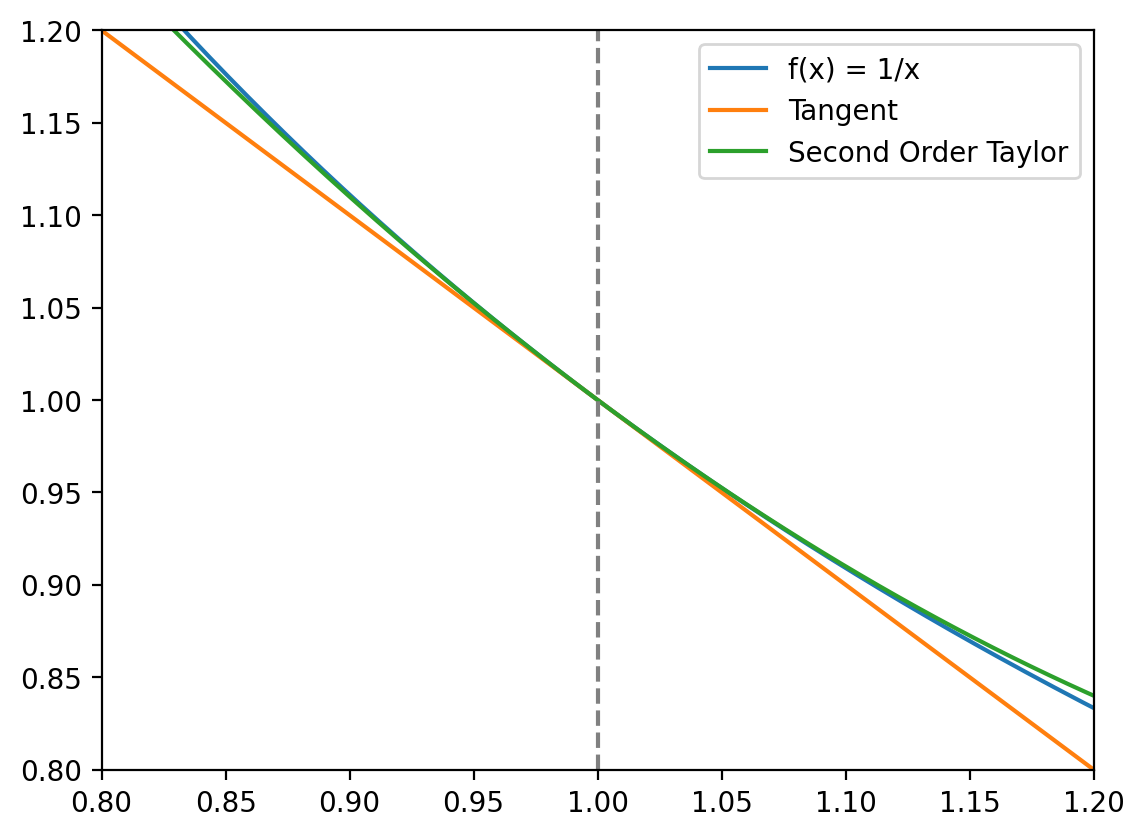

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## for high resolution image
%config InlineBackend.figure_format = 'retina'

# define the function
def f(x):
    return 1/x

# define the point of interest
x0 = 1

# define the tangent line
def tangent(x):
    return -1*(x - x0)/x0**2 + f(x0)

# define the second order Taylor polynomial
def taylor(x):
    return tangent(x) + (x - x0)**2/x0**3

# plot the function, tangent, and Taylor polynomial
x = np.linspace(0.1, 2, 1000)
y = f(x)
t = tangent(x)
p = taylor(x)
plt.plot(x, y, label='f(x)')
plt.plot(x, t, label='Tangent')
plt.plot(x, p, label='Second Order Taylor')
plt.axvline(x=x0, color='gray', linestyle='--')
plt.legend()
plt.show()

plt.plot(x, y, label='f(x) = 1/x')
plt.plot(x, t, label='Tangent')
plt.plot(x, p, label='Second Order Taylor')
plt.axvline(x=x0, color='gray', linestyle='--')
plt.xlim(x0-0.2,x0+0.2)
plt.ylim(f(x0)-0.2,f(x0)+0.2)
plt.legend()
plt.show()

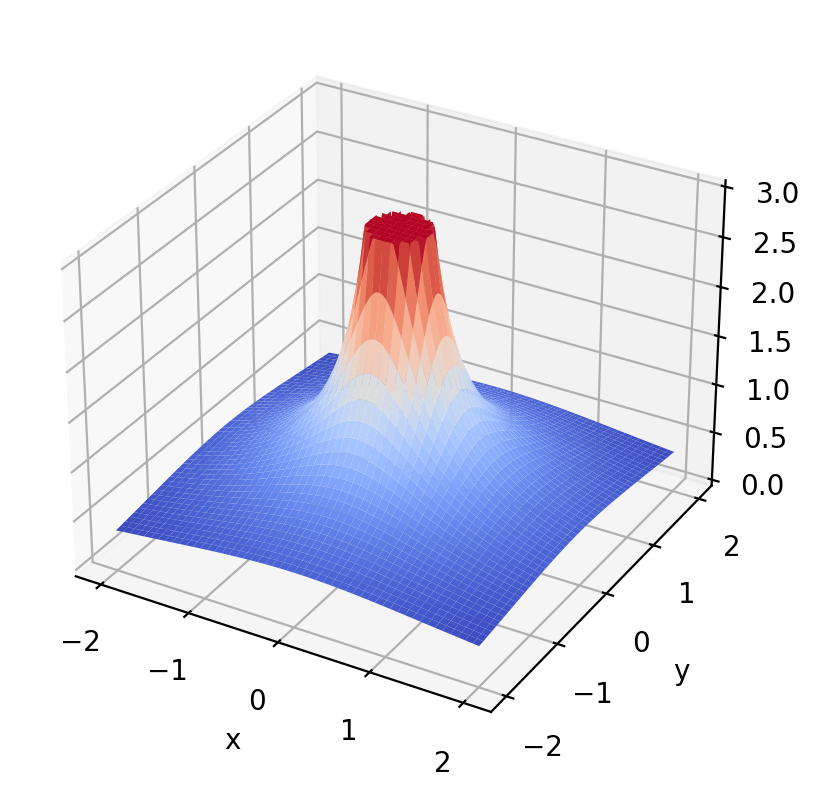

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## for high resolution image
%config InlineBackend.figure_format = 'retina'

z_max = 3

# Define the function f(x,y) = z
def f(x, y, c=z_max):
    res = 1/np.sqrt(x*x + y*y)
    res[res>c] = c
    return res

# Create a meshgrid of x and y values
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)

# Evaluate the function f(x,y) at each point on the meshgrid
Z = f(X, Y)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the colormap to 'coolwarm' (or any other colormap you like)
colormap = plt.cm.coolwarm

# Plot the surface with the colorscale determined by z values
surface = ax.plot_surface(X, Y, Z, cmap=colormap)

# Add a colorbar to the plot
#fig.colorbar(surface, shrink=0.5, aspect=5)

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_zlim(0,z_max)
# Show the plot
plt.show()
